**Model Evaluation and Selection**

Quantifying a learning algorithm's performance and comparing different models.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [31]:
data = np.loadtxt(r"C:\Users\ABHIJITH\Downloads\data_w3_ex1.csv",delimiter=',')

In [32]:
print(data.shape)

(50, 2)


In [33]:
x = data[:,0]
y = data[:,1]

In [34]:
print(x.shape, y.shape)

(50,) (50,)


In [35]:
x = np.expand_dims(x,axis=1)
y = np.expand_dims(y,axis=1)

In [36]:
print(x.shape, y.shape)

(50, 1) (50, 1)


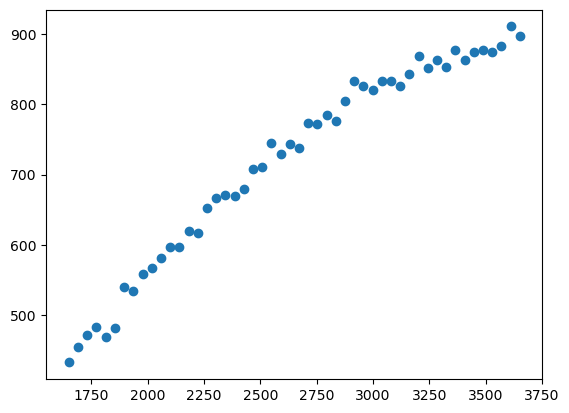

In [37]:
plt.figure()
plt.scatter(x,y)
plt.show()

In [38]:
x_train, x_, y_train, y_ = train_test_split(x,y,test_size = 0.4, random_state=1)
x_cv, x_test, y_cv, y_test = train_test_split(x_,y_, test_size=0.5, random_state=1)
del x_,y_

In [39]:
print(x_train.shape,x_cv.shape,x_test.shape)
print(y_train.shape,y_cv.shape,y_test.shape)

(30, 1) (10, 1) (10, 1)
(30, 1) (10, 1) (10, 1)


In [40]:
scalar_linear = StandardScaler()

x_train_scaled = scalar_linear.fit_transform(x_train)

print(f"mean: {scalar_linear.mean_.squeeze(): .2f}")
print(f"sd: {scalar_linear.scale_.squeeze(): .2f}")



mean:  2504.06
sd:  574.85


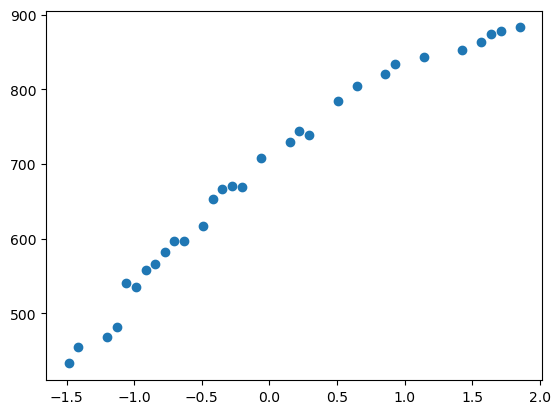

In [41]:
plt.figure()
plt.scatter(x_train_scaled,y_train)
plt.show()

In [42]:
linear_model = LinearRegression()

linear_model.fit(x_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
yhat = linear_model.predict(x_train_scaled)
print(f"training MSE: {mean_squared_error(y_train,yhat)/2}")

training MSE: 406.19374192533155


In [45]:
x_cv_scaled = scalar_linear.transform(x_cv)

yhat = linear_model.predict(x_cv_scaled)

print(f"mse of cv: {mean_squared_error(y_cv,yhat)/2}")

mse of cv: 3696.781174313864


Creating a loop to check polynomial models upto degree 10

In [47]:
train_mses = []
cv_mses = []
models = []
polys = []
scalers = []

for degree in range(1,11):

    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    x_train_mapped = poly.fit_transform(x_train)
    polys.append(poly)

    # Scale the training set
    scaler_poly = StandardScaler()
    x_train_mapped_scaled = scaler_poly.fit_transform(x_train_mapped)
    scalers.append(scaler_poly)

    # Create and train the model
    model = LinearRegression()
    model.fit(x_train_mapped_scaled,y_train)
    models.append(model)

    # Compute the training MSE
    yhat = model.predict(x_train_mapped_scaled)
    train_mse = mean_squared_error(y_train,yhat) / 2
    train_mses.append(train_mse)

    # Add polynomial features and scale the cross validation set
    x_cv_mapped = poly.transform(x_cv)
    x_cv_mapped_scaled = scaler_poly.transform(x_cv_mapped)

    # Compute the cross validation MSE
    yhat = model.predict(x_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv,yhat) / 2
    cv_mses.append(cv_mse)



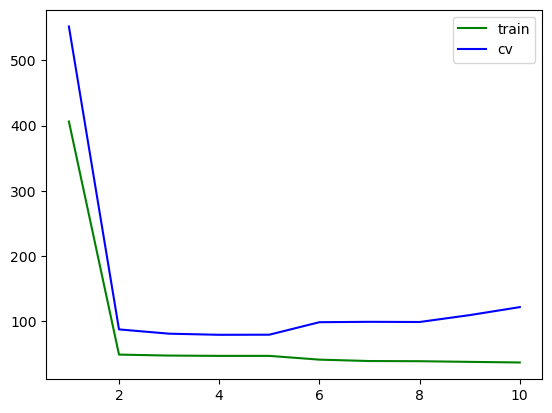

In [49]:
degrees = range(1,11)
plt.plot(degrees, train_mses,c='g',label = 'train')
plt.plot(degrees, cv_mses,c='b',label = 'cv')
plt.legend()
plt.show()

In [50]:
degree = np.argmin(cv_mses)+1
print(f"Lowest CV MSE is found for model with degree: {degree}")


Lowest CV MSE is found for model with degree: 4


In [51]:
x_test_mapped = polys[degree -1].transform(x_test)
x_test_mapped_scaled = scalers[degree-1].transform(x_test_mapped)

In [53]:
yhat = models[degree-1].predict(x_test_mapped_scaled)
test_mse = mean_squared_error(y_test,yhat) / 2
print(f"MSE for test: {test_mse}")

MSE for test: 104.6316820528978
